## Web scraping and data visualization

Importing neccessary libraries for handling HTTP requests, web scraping and data manipulation and analysis.

In [94]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

Now I set up "request" library in order to send HTTP requests to a website. It fetches the HTML content of our desired webpage, which can then be parsed.

In [95]:
# URL of a testing dummy website
url = "https://www.scrapethissite.com/pages/forms/"
response = requests.get(url)

if response.status_code == 200:
    print("Valid response, you can continue.")
else:
    print("Invalid request!")

Valid response, you can continue.


In [96]:

soup = BeautifulSoup(response.content, 'html.parser')

teams = []
for row in soup.find_all('tr', class_='team'):
    cells = row.find_all('td')
    team_data = {
        'Name': cells[0].text.strip(),
        'Year': cells[1].text.strip(),
        'Wins': cells[2].text.strip(),
        'Losses': cells[3].text.strip(),
        'Win %': cells[5].text.strip(),
        'Goals For (GF)': cells[6].text.strip(),
        'Goals Against (GA)': cells[7].text.strip()
    }
    teams.append(team_data)

# Adjusting output format, so the columns are shown side by side as in normal spreadsheet
pd.set_option('display.width', 1000)

df = pd.DataFrame(teams)
print(df)

                     Name  Year Wins Losses  Win % Goals For (GF) Goals Against (GA)
0           Boston Bruins  1990   44     24   0.55            299                264
1          Buffalo Sabres  1990   31     30  0.388            292                278
2          Calgary Flames  1990   46     26  0.575            344                263
3      Chicago Blackhawks  1990   49     23  0.613            284                211
4       Detroit Red Wings  1990   34     38  0.425            273                298
5         Edmonton Oilers  1990   37     37  0.463            272                272
6        Hartford Whalers  1990   31     38  0.388            238                276
7       Los Angeles Kings  1990   46     24  0.575            340                254
8   Minnesota North Stars  1990   27     39  0.338            256                266
9      Montreal Canadiens  1990   39     30  0.487            273                249
10      New Jersey Devils  1990   32     33    0.4            272

If I want to save DataFrame to a CSV file

In [97]:
# df.to_csv('hockey_teams.csv', index=False)
# print("Data saved to hockey_teams.csv")

If I want to add another column that shows difference in goals scored and conceded for each team. (It is shown on the training page, but I want to do it manually)

In [98]:
# Firstly I need to change data type of the two columns to numeric
df['Goals For (GF)'] = pd.to_numeric(df['Goals For (GF)'])
df['Goals Against (GA)'] = pd.to_numeric(df['Goals Against (GA)'])

# Then I can substract the values
df['Goals average'] = df['Goals For (GF)'] - df['Goals Against (GA)']
print (df)

                     Name  Year Wins Losses  Win %  Goals For (GF)  Goals Against (GA)  Goals average
0           Boston Bruins  1990   44     24   0.55             299                 264             35
1          Buffalo Sabres  1990   31     30  0.388             292                 278             14
2          Calgary Flames  1990   46     26  0.575             344                 263             81
3      Chicago Blackhawks  1990   49     23  0.613             284                 211             73
4       Detroit Red Wings  1990   34     38  0.425             273                 298            -25
5         Edmonton Oilers  1990   37     37  0.463             272                 272              0
6        Hartford Whalers  1990   31     38  0.388             238                 276            -38
7       Los Angeles Kings  1990   46     24  0.575             340                 254             86
8   Minnesota North Stars  1990   27     39  0.338             256                

## Data Visualization

When I have the dataset I was seeking, I can proceed to data visualization. Firstly, I import neccessary libraries for data visualization.

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

Now I can proceed to the visualization itself. In the first diagram, a comparison of wins and losses of each team is shown.

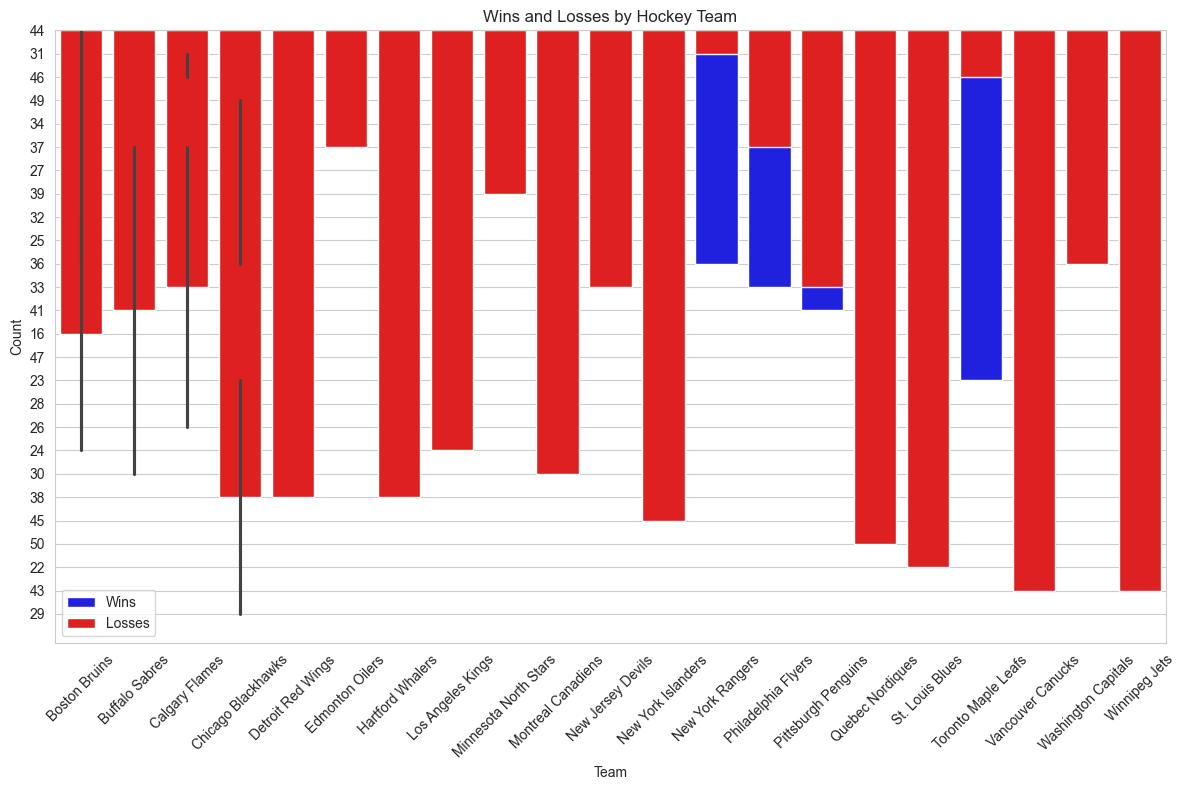

In [100]:
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Name', y='Wins', data=df, label='Wins', color='b')
sns.barplot(x='Name', y='Losses', data=df, label='Losses', color='r')

plt.xticks(rotation=45)
plt.xlabel('Team')
plt.ylabel('Count')
plt.title('Wins and Losses by Hockey Team')
plt.legend()
plt.tight_layout()
plt.show()

In the next diagram, I will create a heatmap of wins in a year for each team.

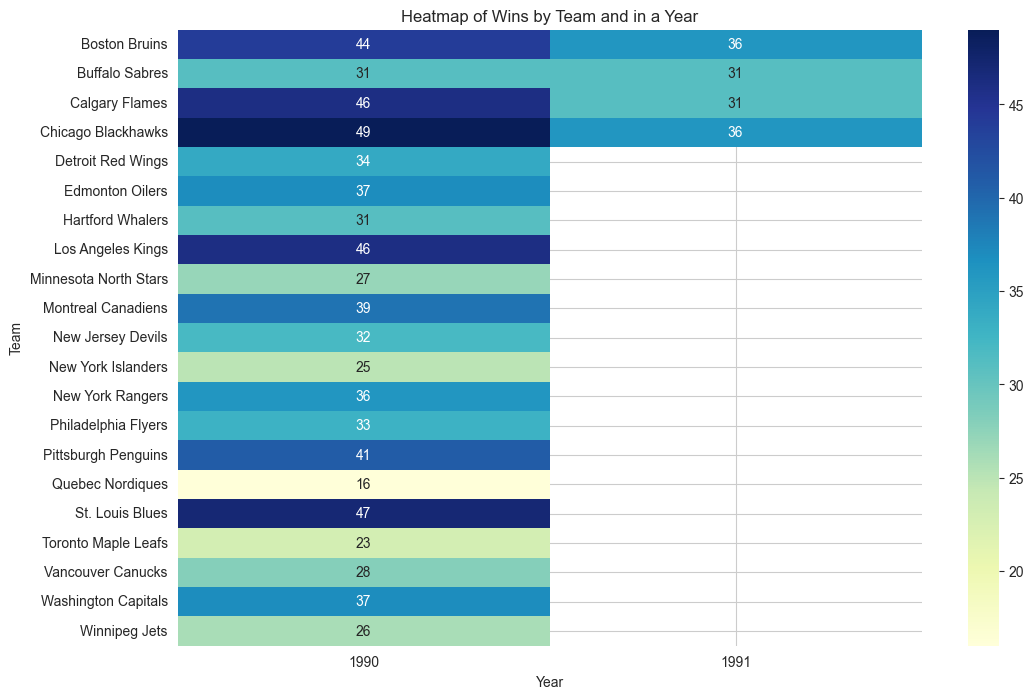

In [101]:
# I need to make the win column numeric first
df['Wins'] = pd.to_numeric(df['Wins'], errors='coerce')

# Create Pivot of the DataFrame
pivot_table = df.pivot(index='Name', columns='Year', values='Wins')

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")

plt.title('Heatmap of Wins by Team and in a Year')
plt.ylabel('Team')
plt.xlabel('Year')
plt.show()